## Census Income Project

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics).

A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset
df=pd.read_csv('census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


The data set has 32560 rows and 15 columns.

In [3]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


The data set has numerical and object columns

In [4]:
#checking null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

The dataset doesnt show any null values

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


<AxesSubplot:xlabel='Workclass', ylabel='count'>

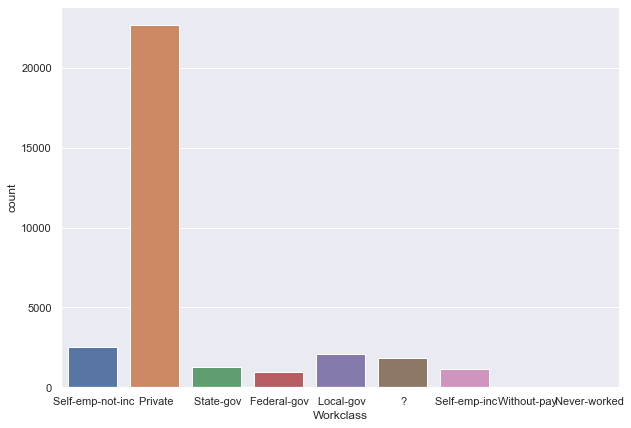

In [5]:
#checking the clumns
sns.set_theme(style="darkgrid")
print(df['Workclass'].value_counts())
plt.figure(figsize=(10,7))
sns.countplot(df['Workclass'])

The work class information seems to be having '?' value which probable denotes unknown, Majority of the people work in private sector.
Followed by self-emp-not-inc

7 values has no wor experience
14 are workinng without pay

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


<AxesSubplot:xlabel='Education', ylabel='count'>

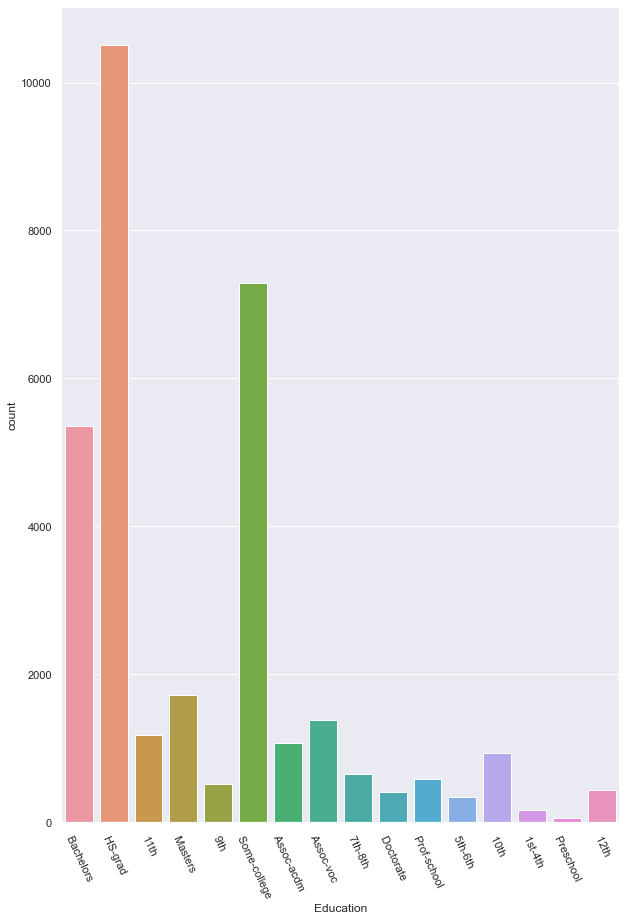

In [6]:
#checking the object clumns
print(df['Education'].value_counts())
plt.figure(figsize=(10,15))
plt.xticks(rotation=-65)
sns.countplot(df['Education'])

Most common educational qualification is high school grad.

A very low percent have just preschool education.

college education is the second most frequent qualification followed by Bachelors



 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


<AxesSubplot:xlabel='Marital_status', ylabel='count'>

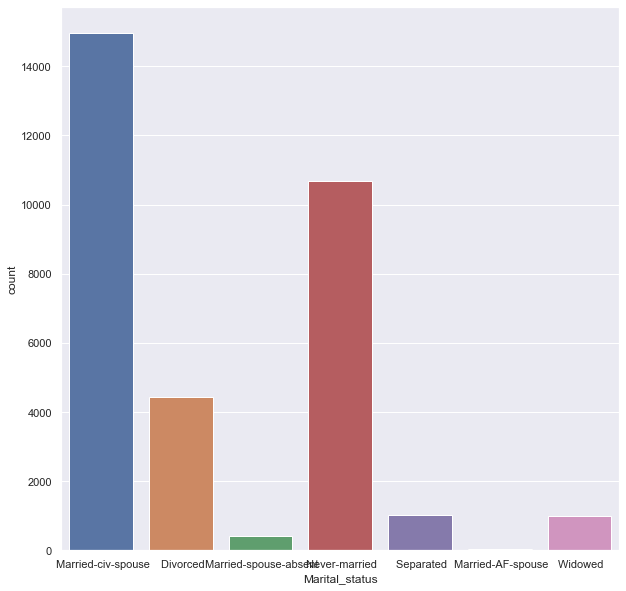

In [7]:
#checking object columns
print(df['Marital_status'].value_counts())
plt.figure(figsize=(10,10))
sns.countplot(df['Marital_status'])

Majority in the dataset are  married, Followed by unmarried Population

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


<AxesSubplot:xlabel='Occupation', ylabel='count'>

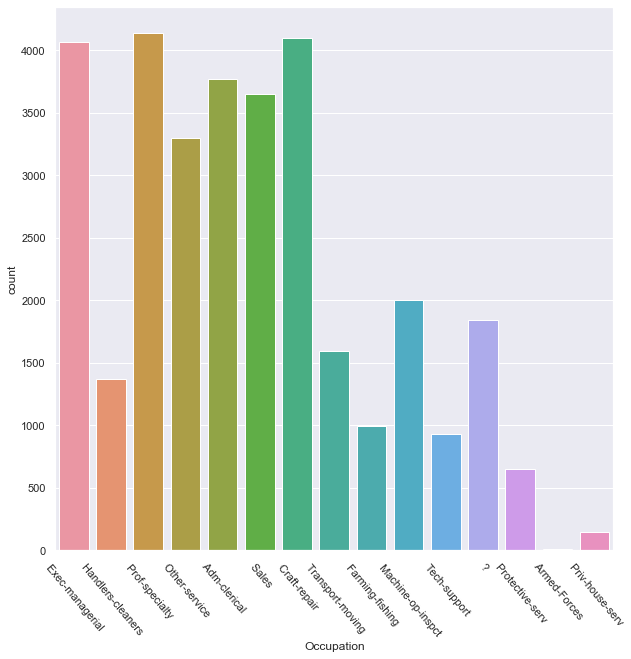

In [8]:
#checking object columns
print(df['Occupation'].value_counts())
plt.figure(figsize=(10,10))
plt.xticks(rotation=-50)
sns.countplot(df['Occupation'])

Exec-mangerial,prof-speciality,craft-repair are the most common jobs, priv house serv is the least frequesnt job

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


<AxesSubplot:xlabel='Relationship', ylabel='count'>

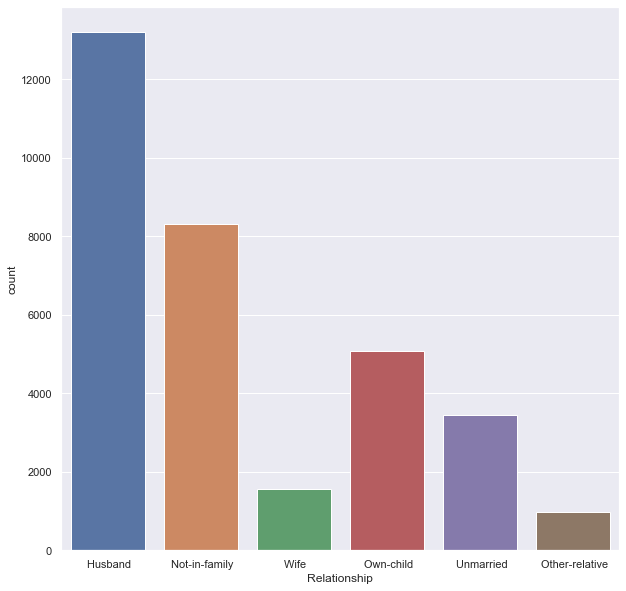

In [9]:
#checking object columns
print(df['Relationship'].value_counts())
plt.figure(figsize=(10,10))
##plt.xticks(rotation=-50)
sns.countplot(df['Relationship'])

'Husband' is the most recurring column value followed by not-in family

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


<AxesSubplot:xlabel='Race', ylabel='count'>

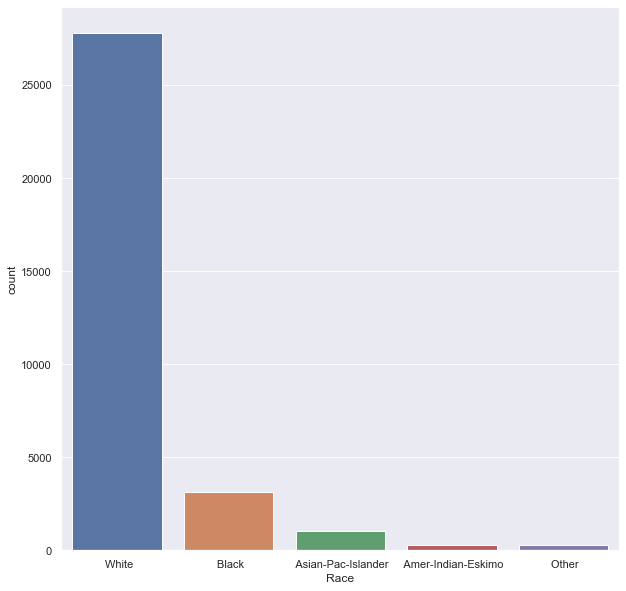

In [10]:
#checking object columns
print(df['Race'].value_counts())
plt.figure(figsize=(10,10))
##plt.xticks(rotation=-50)
sns.countplot(df['Race'])

Most frequesnt race is 'white', followed by 'Black' 

 Male      21789
 Female    10771
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

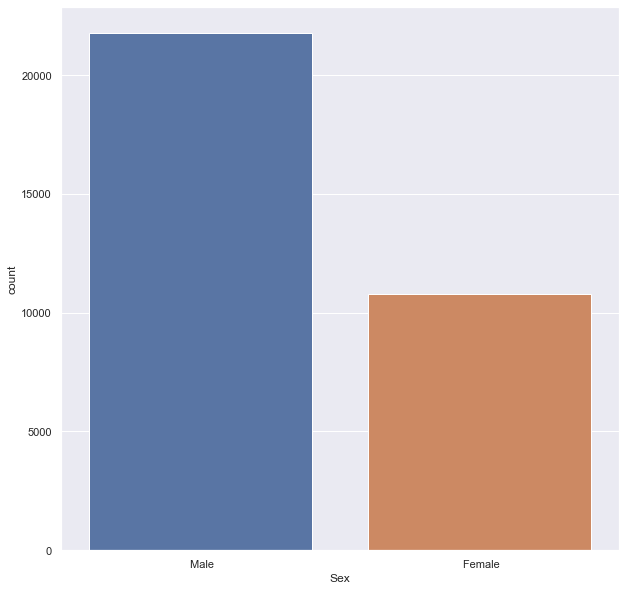

In [11]:
#checking object columns
print(df['Sex'].value_counts())
plt.figure(figsize=(10,10))
##plt.xticks(rotation=-50)
sns.countplot(df['Sex'])

Male is the prominent gender in the dataset

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

<AxesSubplot:xlabel='Native_country', ylabel='count'>

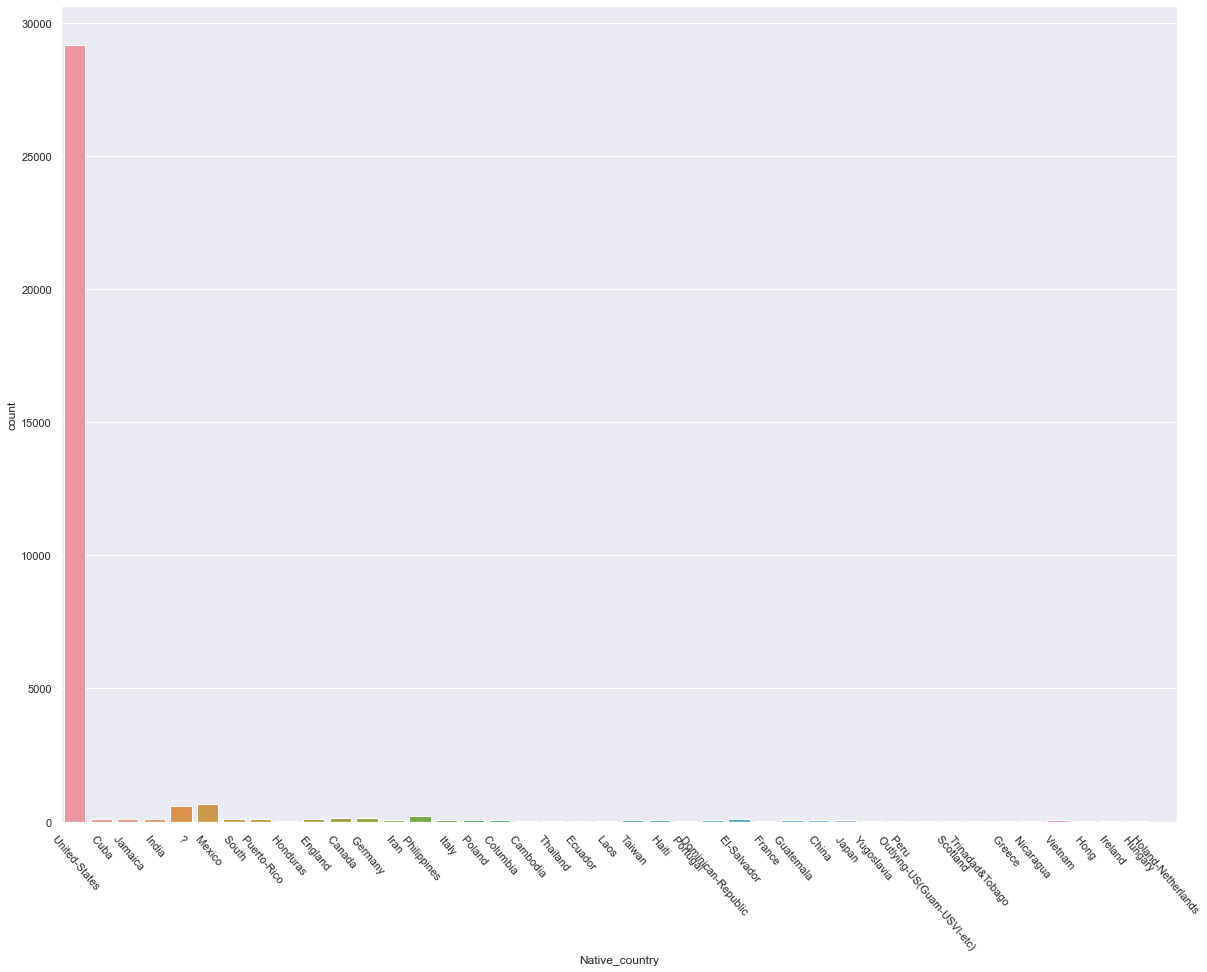

In [12]:
#checking object columns
print(df['Native_country'].value_counts())
plt.figure(figsize=(20,15))
plt.xticks(rotation=-50)
sns.countplot(df['Native_country'])

The native country, with the larger population from united states itself

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


<AxesSubplot:xlabel='Income', ylabel='count'>

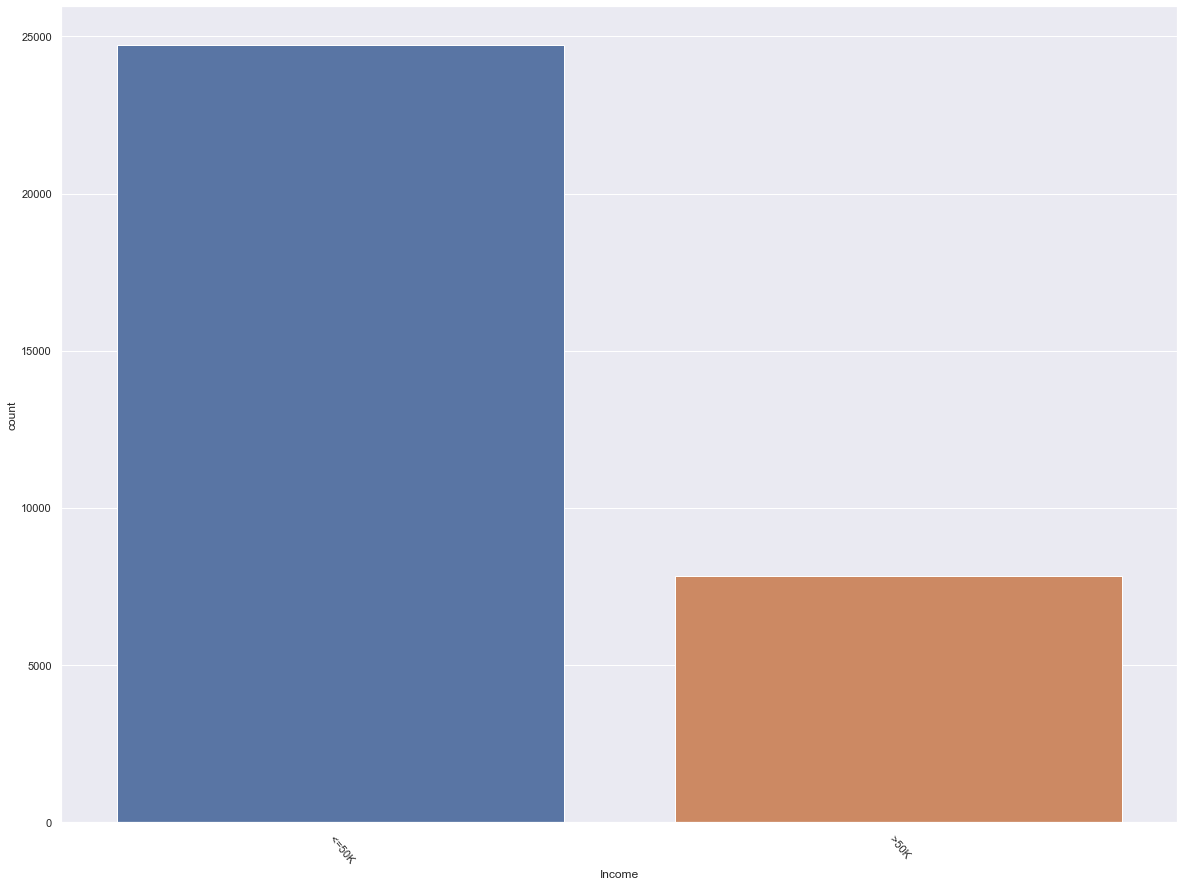

In [13]:
    
#checking object columns
print(df['Income'].value_counts())
plt.figure(figsize=(20,15))
plt.xticks(rotation=-50)
sns.countplot(df['Income'])

The Income will be our target column with two major classes where the population will be classified into, greater than and less than 50k
The output column is imbalanced with less than 50k value is way lesser than that of the other

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: Age, Length: 73, dtype: int64


<AxesSubplot:xlabel='Age', ylabel='Count'>

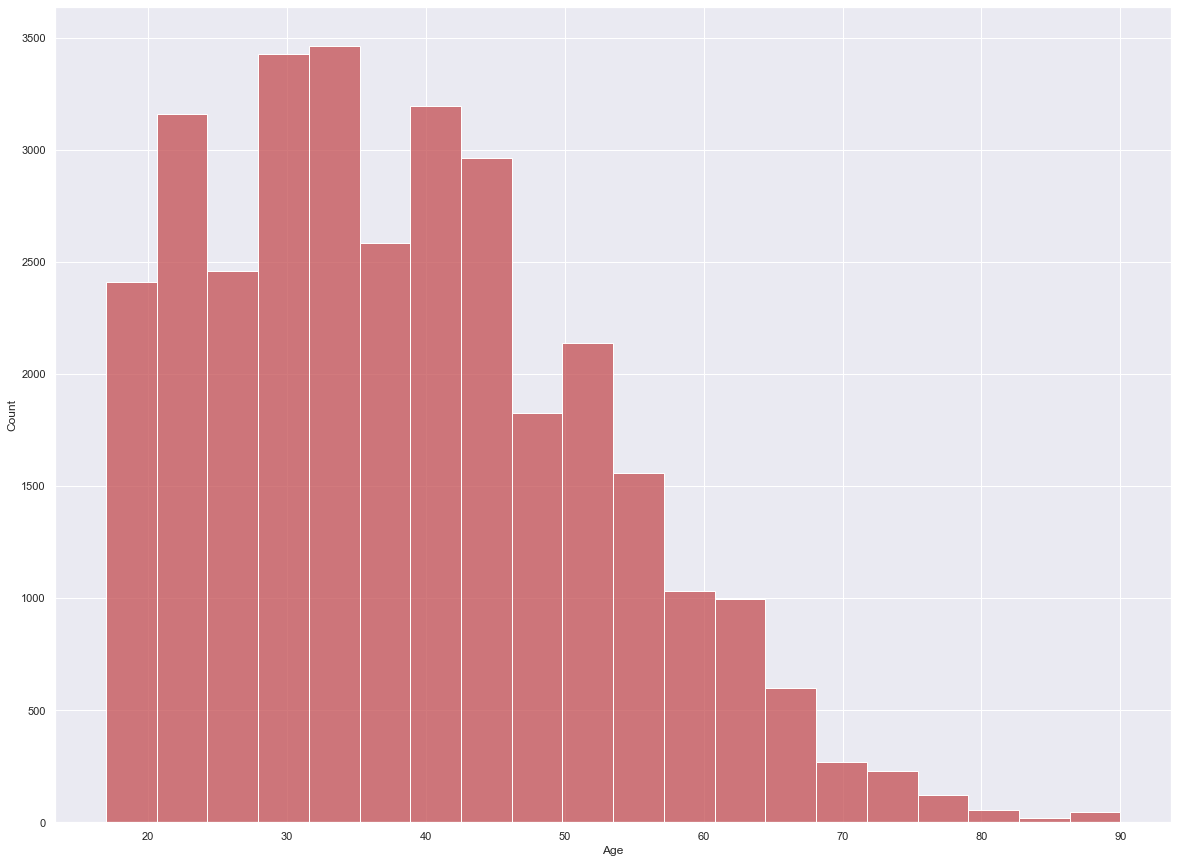

In [14]:
#checking the numerical columns
print(df['Age'].value_counts())
plt.figure(figsize=(20,15))
##plt.xticks(rotation=-50)
sns.histplot(df['Age'],color='r',bins=20)

The age group ranges from 18-90

The majority comes between 20 and 40

123011    13
203488    13
164190    13
121124    12
148995    12
          ..
68318      1
284211     1
312881     1
177711     1
229376     1
Name: Fnlwgt, Length: 21647, dtype: int64


<AxesSubplot:xlabel='Fnlwgt', ylabel='Count'>

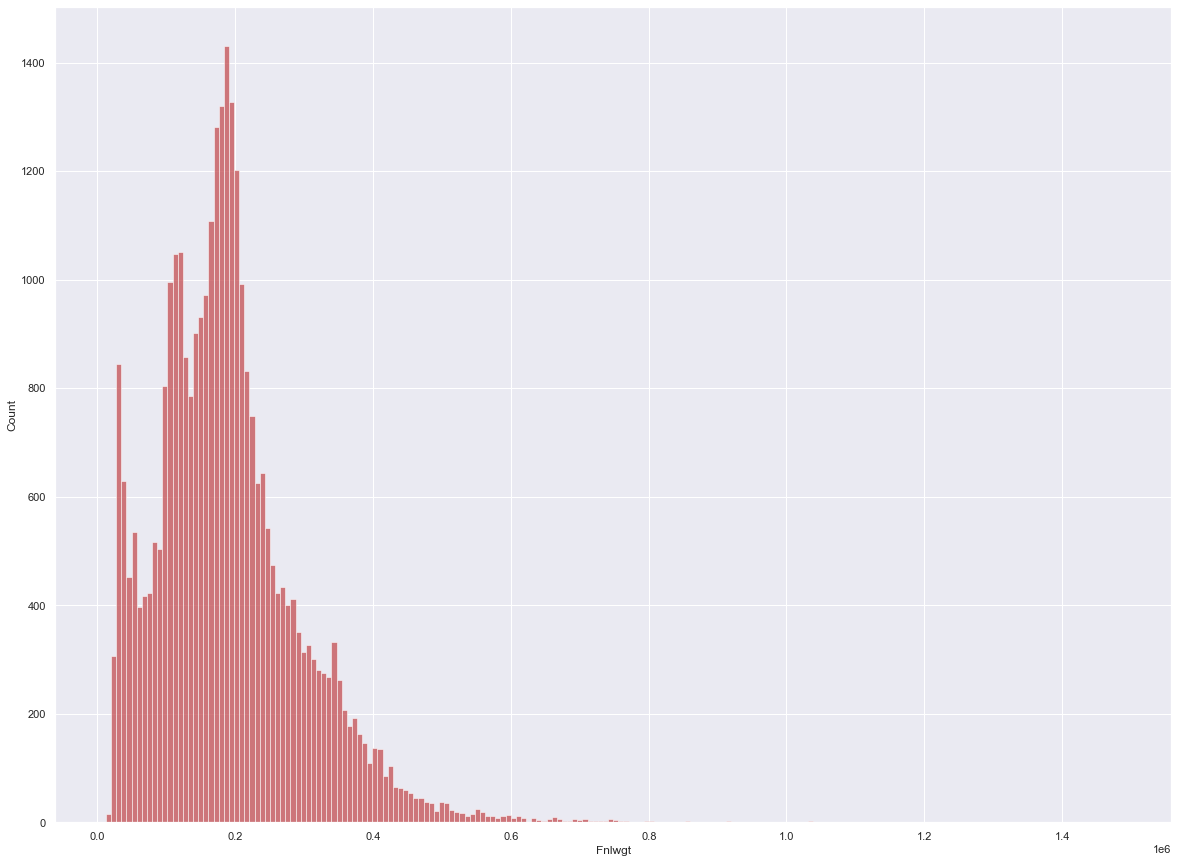

In [15]:
#checking the numerical columns
print(df['Fnlwgt'].value_counts())
plt.figure(figsize=(20,15))
##plt.xticks(rotation=-50)
sns.histplot(df['Fnlwgt'],color='r')

'Final weight' column, representing the weight of the population

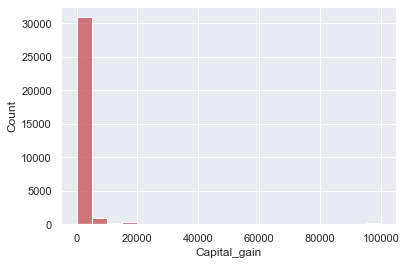

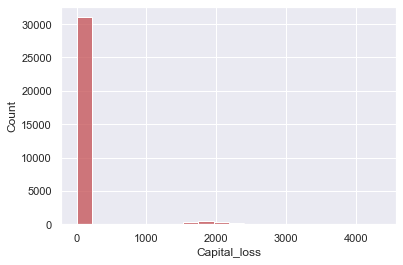

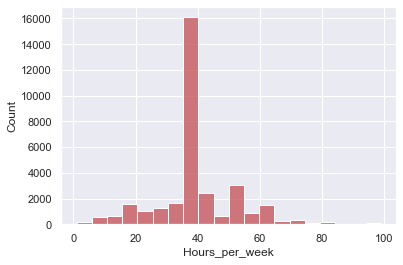

In [16]:
cols=['Capital_gain', 'Capital_loss', 'Hours_per_week']
for i in cols:
   
    ##plt.figure(figsize=(20,15))
    ##plt.xticks(rotation=-50)
    plt.subplots()
    sns.histplot(df[i],color='r',bins=20)
    

The capital gain,the capital loss and the hours per week

Most people work 40 hours a week

We can ignore capital gain and capital loss since majority of the rows in the columns are zero




In [17]:
df.drop(['Capital_gain','Capital_loss'],inplace=True,axis=1)

In [18]:
#handling the ? values in some columns replacing '?' with NaN
df.replace(' ?', np.nan, inplace = True)

In [19]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [20]:
#Replacing values in work class and country with most frequent
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['Workclass'] = si.fit_transform(df['Workclass'].values.reshape(-1, 1))
df['Native_country'] = si.fit_transform(df['Native_country'].values.reshape(-1, 1))
df['Occupation'] = si.fit_transform(df['Occupation'].values.reshape(-1, 1))

In [21]:
#splitting 
cat_cols = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country','Income']
numer_cols = ['Age', 'Fnlwgt', 'Hours_per_week']

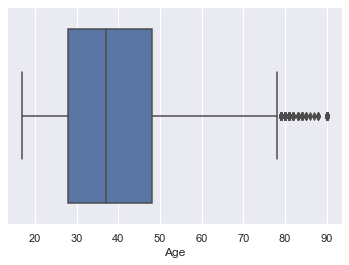

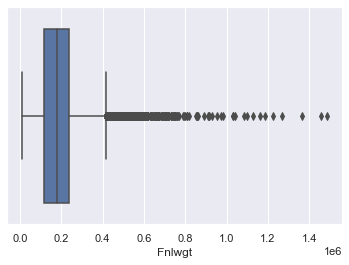

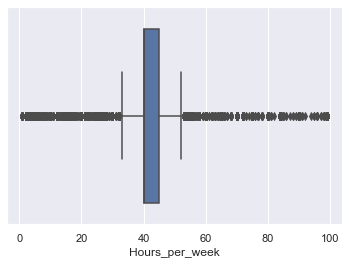

In [22]:
#checking for outliers using boxplot
for i in numer_cols:
    plt.subplots()
    sns.boxplot(df[i])


The boxplots are showing the presence of outliers in the numerical columns

<AxesSubplot:xlabel='Age', ylabel='count'>

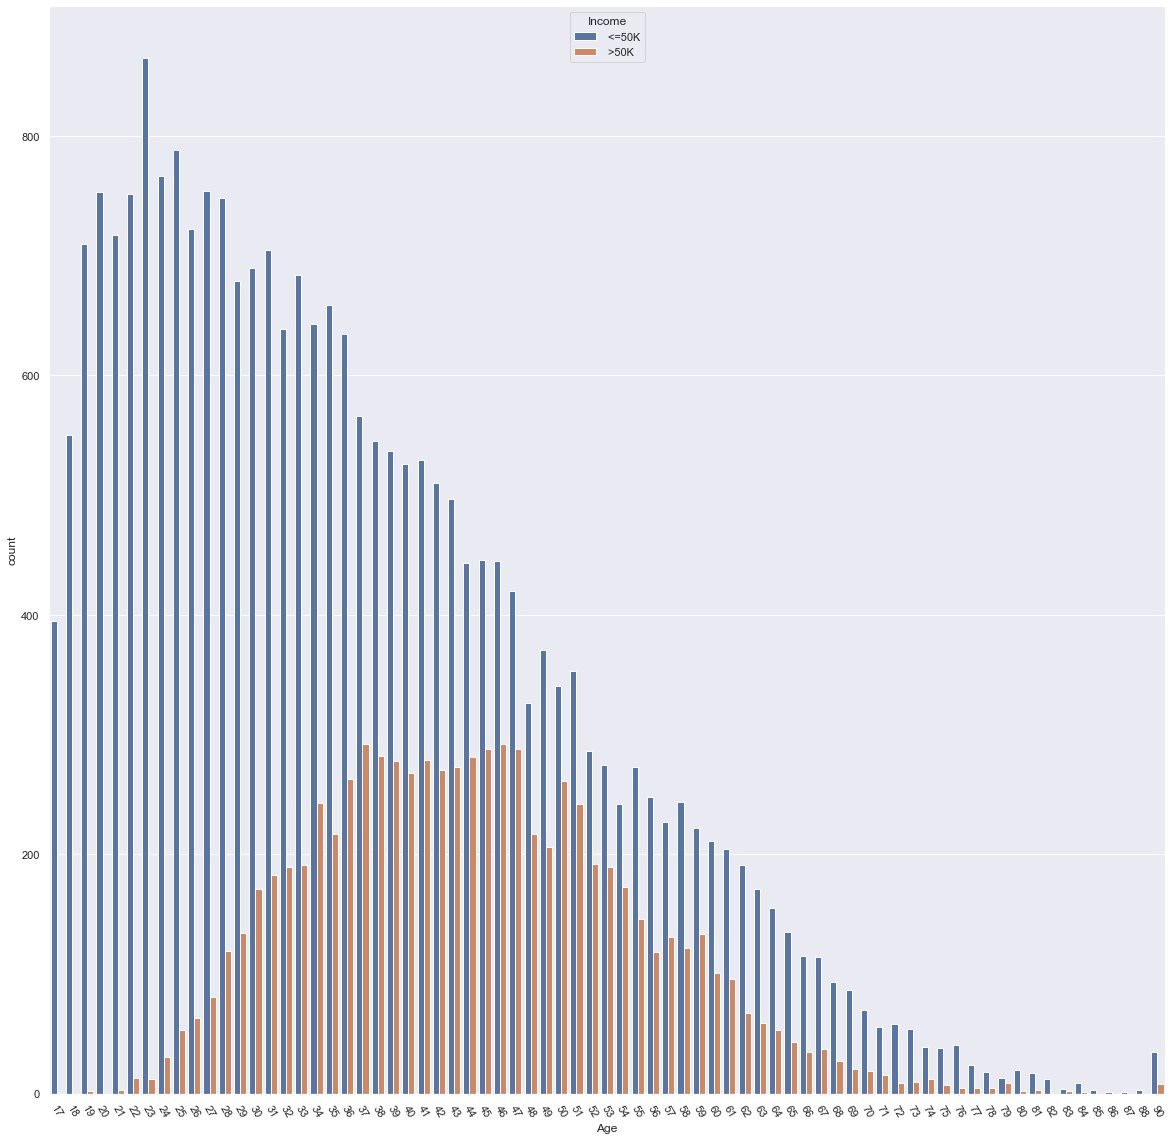

In [23]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=-60)
sns.countplot(x='Age',hue='Income',data=df)

The higher income groups are frequent in the age group mid 20 to mid 40's
which then declines, the plot shows outliers.

<AxesSubplot:xlabel='Workclass', ylabel='count'>

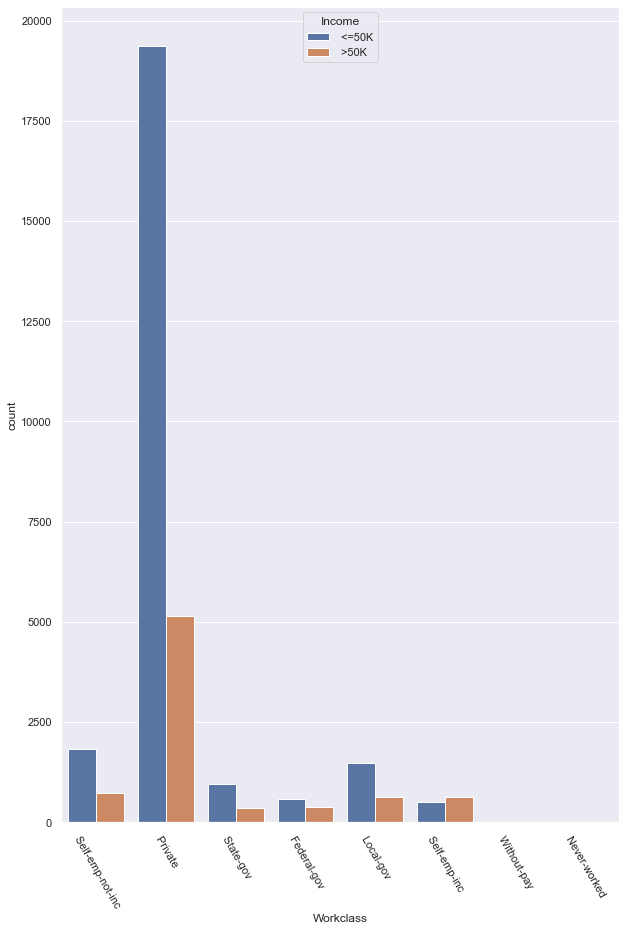

In [24]:
#plotting income and work class
plt.figure(figsize=(10,15))
plt.xticks(rotation=-60)
sns.countplot(x='Workclass',hue='Income',data=df)

The private sector offers most higher and lower incomes as the data set has majority of private sector catogory

The govt sectors has the least number of higher income individuals

<AxesSubplot:xlabel='Education', ylabel='count'>

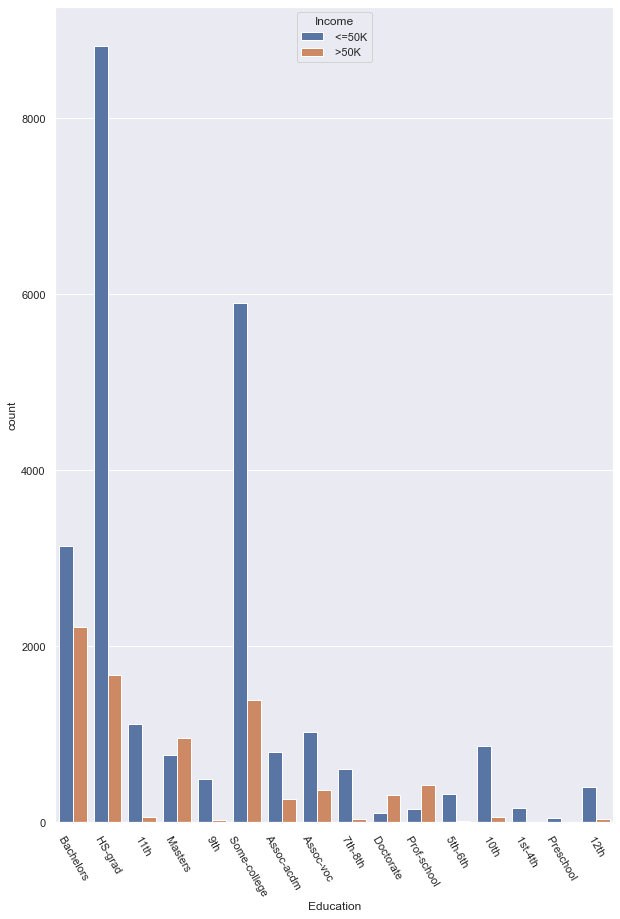

In [25]:
#plotting Education and work class
plt.figure(figsize=(10,15))
plt.xticks(rotation=-60)
sns.countplot(x='Education',hue='Income',data=df)

The eduacation has a clear impact on the income, People with a degree seems to be having high earning gigs

<AxesSubplot:xlabel='Race', ylabel='count'>

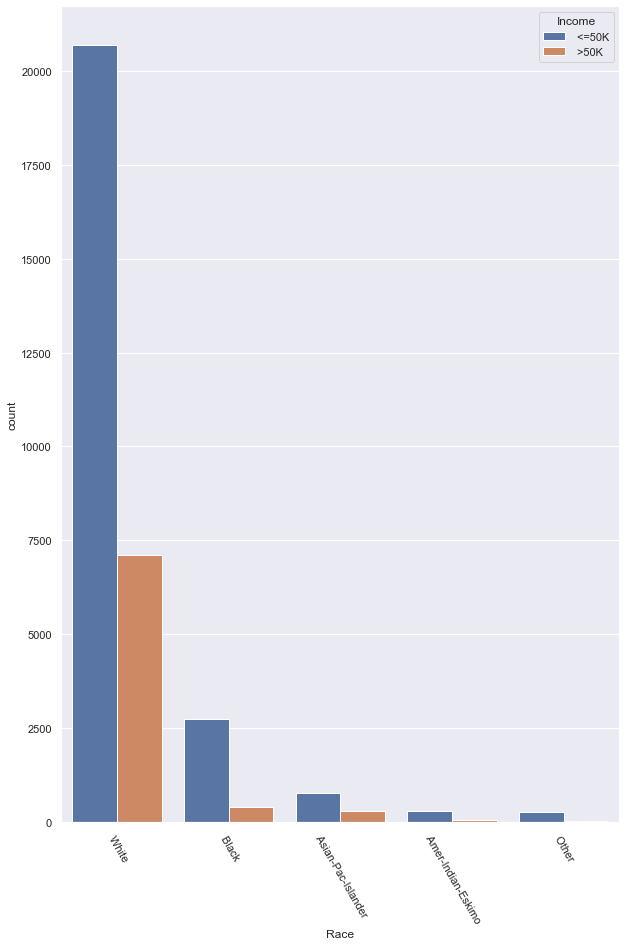

In [26]:
#plotting Race and work class
plt.figure(figsize=(10,15))
plt.xticks(rotation=-60)
sns.countplot(x='Race',hue='Income',data=df)

The white people has the highest number of both earning individuals
However, the disparity between both in other communities especially in 'Black', shows that race has some impact on the income

<AxesSubplot:xlabel='Sex', ylabel='count'>

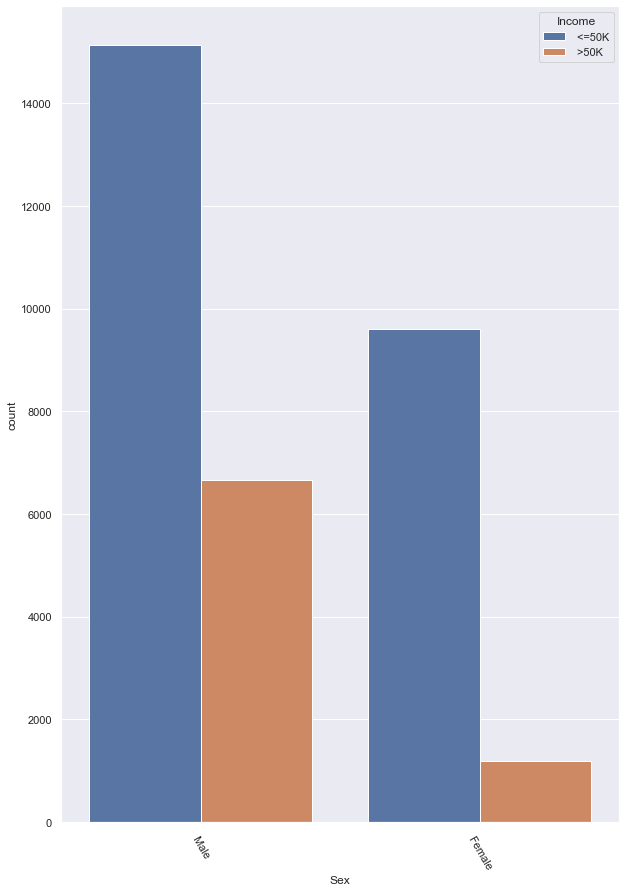

In [27]:
#plotting Sex and work class
plt.figure(figsize=(10,15))
plt.xticks(rotation=-60)
sns.countplot(x='Sex',hue='Income',data=df)

The 'Male' gender has the most high earning individuals compared to female

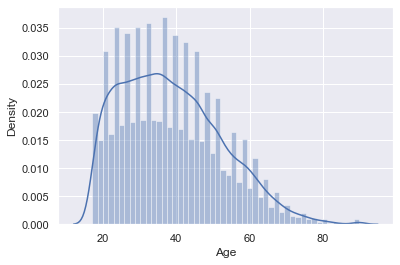

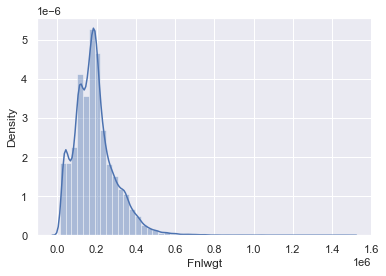

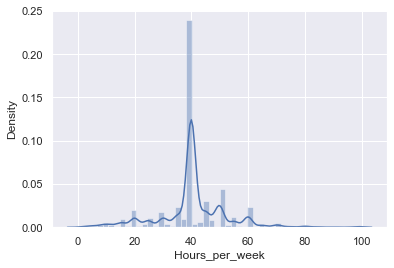

In [28]:
#checking the skewness
for i in numer_cols:
    plt.subplots()
    sns.distplot(df[i])

The plots shows the possibilty of skewness in age columns

### Encoding

In [29]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1,1))

In [30]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,13,38.0,0.0
1,38,3.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,40,38.0,0.0
2,53,3.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,40,38.0,0.0
3,28,3.0,338409,9.0,13,2.0,9.0,5.0,2.0,0.0,40,4.0,0.0
4,37,3.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,40,38.0,0.0


In [31]:
#checking correlation
dfcor=df.corr()
dfcor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.040506,-0.076646,-0.010508,0.036527,-0.266292,0.001740,-0.263698,0.028718,0.088832,0.068756,-0.000271,0.234039
Workclass,0.040506,1.000000,-0.024255,0.004901,0.003445,-0.020545,0.007236,-0.057931,0.048323,0.071535,0.042206,-0.001646,0.002739
Fnlwgt,-0.076646,-0.024255,1.000000,-0.028156,-0.043159,0.028184,0.000138,0.008922,-0.021278,0.026882,-0.018770,-0.063279,-0.009481
Education,-0.010508,0.004901,-0.028156,1.000000,0.359172,-0.038398,-0.041297,-0.010879,0.014135,-0.027349,0.055510,0.076062,0.079311
Education_num,0.036527,0.003445,-0.043159,0.359172,1.000000,-0.069338,0.071012,-0.094145,0.031825,0.012256,0.148127,0.088887,0.335182
Marital_status,-0.266292,-0.020545,0.028184,-0.038398,-0.069338,1.000000,0.035008,0.185461,-0.068025,-0.129337,-0.190521,-0.021285,-0.199295
Occupation,0.001740,0.007236,0.000138,-0.041297,0.071012,0.035008,1.000000,-0.037465,-0.004821,0.047497,-0.012881,-0.002205,0.034599
Relationship,-0.263698,-0.057931,0.008922,-0.010879,-0.094145,0.185461,-0.037465,1.000000,-0.116052,-0.582453,-0.248975,-0.010710,-0.250924
Race,0.028718,0.048323,-0.021278,0.014135,0.031825,-0.068025,-0.004821,-0.116052,1.000000,0.087197,0.041910,0.116526,0.071853
Sex,0.088832,0.071535,0.026882,-0.027349,0.012256,-0.129337,0.047497,-0.582453,0.087197,1.000000,0.229312,0.002055,0.215995


<AxesSubplot:>

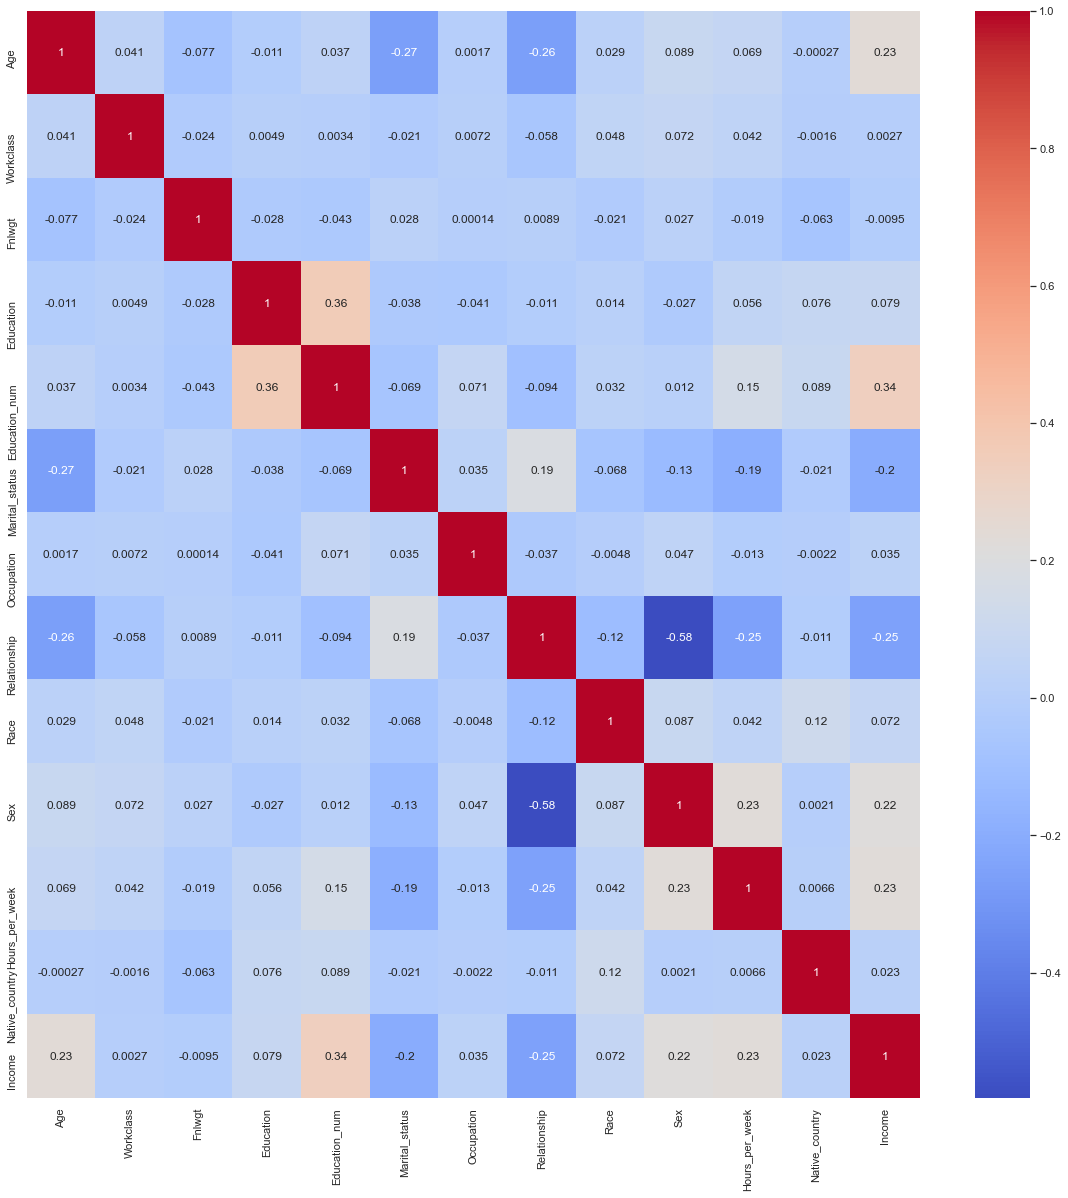

In [32]:
#plotting the correlation
plt.figure(figsize=(20,20))
sns.heatmap(dfcor,annot=True,cmap="coolwarm")

The education_num seems to be having the highest correlation to the target column

In [33]:
#checking correlation to the target 
dfcor['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Sex               0.215995
Education         0.079311
Race              0.071853
Occupation        0.034599
Native_country    0.023063
Workclass         0.002739
Fnlwgt           -0.009481
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

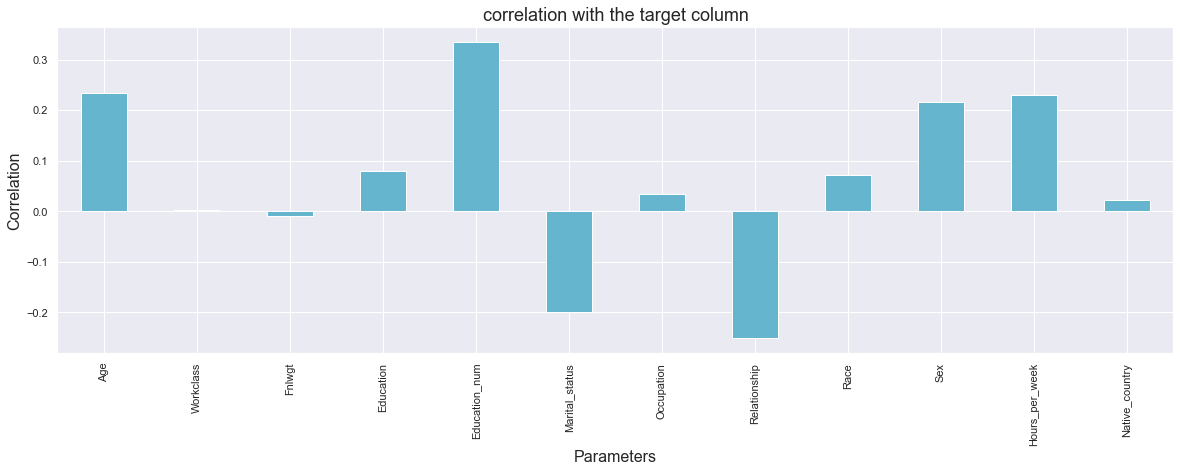

In [34]:
#plotting the correlation to the target column
plt.figure(figsize = (20,6))
dfcor['Income'].drop(['Income']).plot(kind = 'bar', color = 'c')
plt.xlabel('Parameters', fontsize = 16)
plt.ylabel('Correlation', fontsize = 16)
plt.title('correlation with the target column', fontsize = 18)
plt.show()

Plot is showing the possitive and negative correlation of different features to the target column

In [35]:
df.skew()

Age               0.558738
Workclass         0.076178
Fnlwgt            1.446972
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.000536
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Hours_per_week    0.227636
Native_country   -4.243083
Income            1.212383
dtype: float64

In [36]:
df['Age']=np.sqrt(df['Age'])
df['Fnlwgt']=np.cbrt(df['Fnlwgt'])

In [37]:
df.skew()

Age               0.204335
Workclass         0.076178
Fnlwgt           -0.164177
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.000536
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Hours_per_week    0.227636
Native_country   -4.243083
Income            1.212383
dtype: float64

### Spltting x and y

In [38]:
x = df.drop('Income', axis = 1)
y = df['Income']

### Handling the Imbalance in the Target, Over Sampling

In [39]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_over,y_over=sm.fit_resample(x,y)

In [40]:
x_over.shape

(49438, 12)

In [41]:
y_over.shape

(49438,)

In [42]:
#scaling

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x_over)

In [43]:
#importing models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [44]:
#checking the best random state

lr=LogisticRegression()
maxacc=0
maxrs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = .30, random_state = i)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test, predlr)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('best accuracy',maxacc,'on random state',maxrs)

best accuracy 0.7646305285868392 on random state 102


In [57]:
#spitting with best random state
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = .30, random_state = 102)

In [58]:
x_train.shape

(34606, 12)

In [59]:
y_test.shape

(14832,)

In [60]:
y_train.shape

(34606,)

In [61]:
x_test.shape

(14832, 12)

In [62]:
def model(mod):
    print("Model:",mod)
    mod.fit(x_train, y_train)
    mod.score(x_train, y_train)
    pred = mod.predict(x_test)
    ##print(confusion_matrix(y_test, pred))
    print('\n')
    print('\n')
    ##print(classification_report(y_test, pred))
    crossval_scores = cross_val_score(mod, x_over, y_over, cv = 5)
    accuracy=accuracy_score(y_test, pred)
    print("Accuracy score:",accuracy)
    ##print('Cross validation Scores for ', mod)
    ##print(crossval_scores)
    print('\n')
    mean_crossval=crossval_scores.mean()
    print('Mean cross validation Score: ',mean_crossval)
    difference=accuracy-mean_crossval
    print('difference between crossvalidation score and actual score:',difference)

In [63]:
model(LogisticRegression())

Model: LogisticRegression()




Accuracy score: 0.7646305285868392


Mean cross validation Score:  0.7423443937529683
difference between crossvalidation score and actual score: 0.022286134833870874


In [64]:
model(GaussianNB())

Model: GaussianNB()




Accuracy score: 0.7741370010787486


Mean cross validation Score:  0.7691051519713212
difference between crossvalidation score and actual score: 0.0050318491074273775


In [65]:
model(RandomForestClassifier())

Model: RandomForestClassifier()




Accuracy score: 0.8871359223300971


Mean cross validation Score:  0.8803772025179022
difference between crossvalidation score and actual score: 0.006758719812194891


In [66]:
model(KNeighborsClassifier())

Model: KNeighborsClassifier()




Accuracy score: 0.81957928802589


Mean cross validation Score:  0.8253575373402293
difference between crossvalidation score and actual score: -0.005778249314339345


In [67]:
model(DecisionTreeClassifier())

Model: DecisionTreeClassifier()




Accuracy score: 0.8423004314994607


Mean cross validation Score:  0.8310429597984734
difference between crossvalidation score and actual score: 0.011257471700987232


In [68]:
model(AdaBoostClassifier())

Model: AdaBoostClassifier()




Accuracy score: 0.8559196332254585


Mean cross validation Score:  0.8458887716798529
difference between crossvalidation score and actual score: 0.010030861545605618


The kneighbours classifier gives the best accuracy based the crossvalidation score

### HyperParameter Tuning

In [69]:
from sklearn.model_selection import GridSearchCV
parameters = {'leaf_size' : [1,5,10],
              'n_neighbors' : [3,5,11,19],
              'p':[1,2],
              'weights':['uniform','distance'],
             'metric':['euclidean','manhattan']}

In [70]:
knc=KNeighborsClassifier()
clf = GridSearchCV(knc, parameters,verbose=1)
clf.fit(x_train, y_train)

print(clf.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
{'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [73]:
knc_f=KNeighborsClassifier(leaf_size=1, p=1,n_neighbors=3,weights='distance',metric='manhattan')
knc_f.fit(x_train,y_train)
knc_f.score(x_train, y_train)
pred = knc_f.predict(x_test)
print(confusion_matrix(y_test, pred))
print('\n')
print('\n')
print(classification_report(y_test, pred))
accuracy=accuracy_score(y_test, pred)
print("Accuracy score:",accuracy)

[[5905 1611]
 [ 422 6894]]




              precision    recall  f1-score   support

         0.0       0.93      0.79      0.85      7516
         1.0       0.81      0.94      0.87      7316

    accuracy                           0.86     14832
   macro avg       0.87      0.86      0.86     14832
weighted avg       0.87      0.86      0.86     14832

Accuracy score: 0.8629314994606256


#### Accuracy score: 0.8629314994606256

### AUC-ROC

In [74]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [75]:
y_pred_prob = knc_f.predict_proba(x_test)[:, 0]

In [76]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

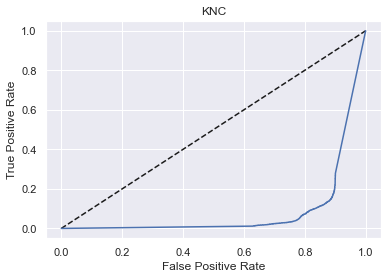

In [77]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label = 'Kneighbors Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNC')
plt.show()

### Saving Model

In [79]:
import joblib
joblib.dump(knc_f, 'Income_pred.obj')
model = joblib.load('Income_pred.obj')
model.predict(x_train)

array([0., 0., 0., ..., 1., 0., 1.])

In [80]:
conclusion = pd.DataFrame([model.predict(x_test)[:], pred[:]], index = ['Predicted', 'Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,14822,14823,14824,14825,14826,14827,14828,14829,14830,14831
Predicted,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
Original,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0


### Final Accuracy=86.29314994606256